In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
Treinamento = pd.read_csv("diabetes_dataset.csv")
Teste = pd.read_csv("diabetes_app.csv")

In [30]:
Treinamento['Pregnancies'] = Treinamento['Pregnancies']/Treinamento['Pregnancies'].max()
Treinamento['Insulin'] = Treinamento['Insulin']/Treinamento['Insulin'].max()
Treinamento['Glucose'] = Treinamento['Glucose']/Treinamento['Glucose'].max()
Treinamento['BloodPressure'] = Treinamento['BloodPressure']/Treinamento['BloodPressure'].max()
Treinamento['SkinThickness'] = Treinamento['SkinThickness']/Treinamento['SkinThickness'].max()
Treinamento['Insulin'] = Treinamento['Insulin']/Treinamento['Insulin'].max()
Treinamento['BMI'] = Treinamento['BMI']/Treinamento['BMI'].max()
Treinamento['DiabetesPedigreeFunction'] = Treinamento['DiabetesPedigreeFunction']/Treinamento['DiabetesPedigreeFunction'].max()
Treinamento['Age'] = Treinamento['Age']/Treinamento['Age'].max()
Treinamento

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.000000,0.695431,0.377358,0.673077,0.225806,0.752182,0.982396,0.407407,1
1,0.117647,1.000000,0.660377,0.865385,0.729839,0.532286,0.067840,0.654321,1
2,0.000000,0.598985,0.792453,0.903846,0.309140,0.799302,0.236582,0.382716,1
3,0.058824,0.522843,0.283019,0.730769,0.111559,0.755672,0.078574,0.407407,0
4,0.176471,0.639594,0.830189,0.788462,0.315860,0.685864,0.302276,0.333333,0
...,...,...,...,...,...,...,...,...,...
191,0.764706,0.776650,0.830189,0.711538,0.188172,0.708551,0.504079,0.481481,0
192,0.705882,0.507614,0.792453,0.634615,0.141129,0.523560,0.209532,0.567901,0
193,0.058824,0.614213,0.735849,0.750000,0.099462,0.680628,0.112065,0.345679,0
194,0.117647,0.446701,0.547170,0.500000,0.021505,0.495637,0.328897,0.271605,0


In [33]:
Treinamento.to_csv("diabetes_dataset.csv", index=False)
Teste['Pregnancies'] = Teste['Pregnancies']/Teste['Pregnancies'].max()
Teste['Glucose'] = Teste['Glucose']/Teste['Glucose'].max()
Teste['BloodPressure'] = Teste['BloodPressure']/Teste['BloodPressure'].max()
Teste['SkinThickness'] = Teste['SkinThickness']/Teste['SkinThickness'].max()
Teste['Insulin'] = Teste['Insulin']/Teste['Insulin'].max()
Teste['BMI'] = Teste['BMI']/Teste['BMI'].max()
Teste['DiabetesPedigreeFunction'] = Teste['DiabetesPedigreeFunction']/Teste['DiabetesPedigreeFunction'].max()
Teste['Age'] = Teste['Age']/Teste['Age'].max()
Teste.to_csv("diabetes_app.csv", index=False)
Teste

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.200000,0.651515,0.581818,0.460317,0.135934,0.393443,0.090496,0.444444
1,0.200000,0.964646,0.618182,0.238095,0.153664,0.460507,0.123554,0.539683
2,1.000000,0.686869,0.636364,0.507937,0.130024,0.552906,0.063223,0.682540
3,0.066667,0.550505,0.545455,0.126984,0.215130,0.378539,0.391322,0.333333
4,0.533333,0.762626,0.709091,0.507937,0.248227,0.639344,0.213223,0.571429
...,...,...,...,...,...,...,...,...
191,0.200000,0.909091,0.581818,0.396825,0.082742,0.506706,0.111983,0.412698
192,0.200000,0.500000,0.490909,0.301587,0.101655,0.381520,0.063636,0.380952
193,0.533333,0.888889,0.818182,0.539683,0.354610,0.502235,0.192975,0.920635
194,0.000000,0.424242,0.745455,0.492063,0.147754,0.569300,0.096281,0.365079


In [34]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Atividade para trabalhar o pré-processamento dos dados.

Criação de modelo preditivo para diabetes e envio para verificação de peformance
no servidor.

@author: Aydano Machado <aydano.machado@gmail.com>
"""

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import requests

print('\n - Lendo o arquivo com o dataset sobre diabetes')
data = pd.read_csv('diabetes_dataset.csv')

# Criando X and y par ao algorítmo de aprendizagem de máquina.\
print(' - Criando X e y para o algoritmo de aprendizagem a partir do arquivo diabetes_dataset')
# Caso queira modificar as colunas consideradas basta algera o array a seguir.
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = data[feature_cols]
y = data.Outcome

# Ciando o modelo preditivo para a base trabalhada
print(' - Criando modelo preditivo')
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

#realizando previsões com o arquivo de
print(' - Aplicando modelo e enviando para o servidor')
data_app = pd.read_csv('diabetes_app.csv')
data_app = data_app[feature_cols]
y_pred = neigh.predict(data_app)

# Enviando previsões realizadas com o modelo para o servidor
URL = "https://aydanomachado.com/mlclass/01_Preprocessing.php"

#TODO Substituir pela sua chave aqui
DEV_KEY = "The Overfitters"

# json para ser enviado para o servidor
data = {'dev_key':DEV_KEY,
        'predictions':pd.Series(y_pred).to_json(orient='values')}

# Enviando requisição e salvando o objeto resposta
r = requests.post(url = URL, data = data)

# Extraindo e imprimindo o texto da resposta
pastebin_url = r.text
print(" - Resposta do servidor:\n", r.text, "\n")


 - Lendo o arquivo com o dataset sobre diabetes
 - Criando X e y para o algoritmo de aprendizagem a partir do arquivo diabetes_dataset
 - Criando modelo preditivo
 - Aplicando modelo e enviando para o servidor
 - Resposta do servidor:
 {"status":"success","dev_key":"The Overfitters","accuracy":0.5459183673469388,"old_accuracy":0.60714285714286} 



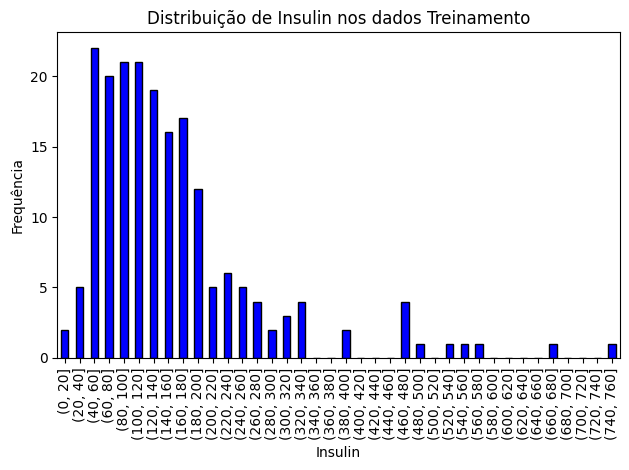

In [25]:
coluna = 'Insulin'
ticks = 20


minimo = Treinamento[coluna].min()
maximo = Treinamento[coluna].max()
bins = range(int(minimo//ticks) * ticks, int(maximo//ticks + 2) * ticks, ticks)

categorias = pd.cut(Treinamento[coluna], bins=bins)

freq = categorias.value_counts().sort_index()

freq.plot(kind='bar', color='blue', edgecolor='black')

plt.xlabel('Insulin')
plt.ylabel('Frequência')
plt.title('Distribuição de Insulin nos dados Treinamento')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

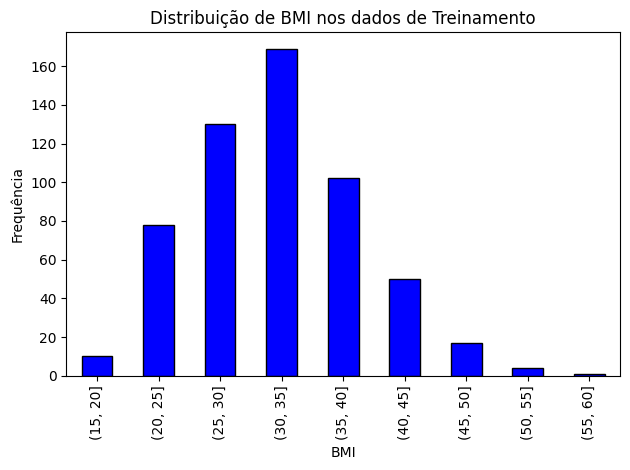

In [14]:
coluna = 'BMI'
ticks = 5


minimo = Treinamento[coluna].min()
maximo = Treinamento[coluna].max()
bins = range(int(minimo//ticks) * ticks, int(maximo//ticks + 2) * ticks, ticks)

categorias = pd.cut(Treinamento[coluna], bins=bins)

freq = categorias.value_counts().sort_index()

freq.plot(kind='bar', color='blue', edgecolor='black')

plt.xlabel('BMI')
plt.ylabel('Frequência')
plt.title('Distribuição de BMI nos dados de Treinamento')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [18]:
print("acima da media: ")
Treinamento[Treinamento['Insulin'] > Treinamento['Insulin'].mean()].shape

acima da media: 


(73, 9)

In [19]:
print("abaixo da media: ")
Treinamento[Treinamento['Insulin'] < Treinamento['Insulin'].mean()].shape

abaixo da media: 


(125, 9)

In [91]:
Treinamento.dropna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
12,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1
14,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0
15,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0
...,...,...,...,...,...,...,...,...,...
553,13,153.0,88.0,37.0,140.0,40.6,1.174,39,0
554,12,100.0,84.0,33.0,105.0,30.0,0.488,46,0
558,1,121.0,78.0,39.0,74.0,39.0,0.261,28,0
565,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0


In [115]:
Treinamento = Treinamento[Treinamento.isna().sum(axis=1) <= 1]

In [116]:
Treinamento

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
12,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1
...,...,...,...,...,...,...,...,...,...
565,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
566,9,170.0,74.0,31.0,NaN,44.0,0.403,43,1
568,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
569,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0


In [141]:
print(f'{(1 - float(Treinamento[Treinamento['Insulin'].isnull()].shape[0]/ Treinamento.shape[0])) * 100:.2f}%') 

58.58%
